I chose a Pokemon fight simulation using python taken from the following GitHub repo. https://github.com/christopher-cao/Pokemon-Simulator-in-Python

This notebook documents of all the modifications to my Pokemon game.

### 1. Change Title Name

Because the game is made using the Tkinter module, the only time where the title is shown is on the top of the window opened. The window of the game also has to be resized to show all the necessary informations. In main.py,

```python
def main():
    root = Tk()
    root.title("Single Player Pokemon Battle")
    root.geometry("800x500")
    app = Application(root)
    root.mainloop()
```

### 2. Change The Characters of Pokemon Names and Attributes

The characters in the name of each Pokemon will be changed.

```python
# Replace Characters
def change_name(name):
    try:
        name = name.replace('a', '@').replace('E', '3').replace('S', '$').replace('l', '!')
        name = name.replace('I', '!').replace('o', '*').replace('H', '#').replace('i',':')
    except:
        pass
    return name

```

### 3. Reverse the Stats of Pokemon

This means that a pokemon with high attacking stats will now have low attacking states and vice versa. This also applies to all other stats

Going through the Kanto Pokemon Spreadsheet csv, I change the characters in the name of the pokemon. The Pokemon and Move columns will be changed.

In [211]:
# List through the pokemon name entries
import pandas as pd

df = pd.read_csv('Kanto Pokemon Spreadsheet.csv', index_col= False)

df.head()

,Nat,Pokemon,Type I,Type II,HP,Atk,Def,SpA,SpD,Spe,Move 1,Move 2,Move 3,Move 4
0,0,Bulbasaur,Grass,Poison,55,51,51,35,35,55,Razor Leaf,Headbutt,Giga Drain,Vine Whip
1,1,Ivysaur,Grass,Poison,40,38,37,20,20,40,Solarbeam,Fury Cutter,Leech Seed,Sunny Day
2,2,Venusaur,Grass,Poison,20,18,17,0,0,20,Giga Drain,Tackle,Poisonpowder,Solarbeam
3,3,Charmander,Fire,NaN,61,48,57,40,50,35,Flamethrower,Slash,Dragonbreath,Ember
4,4,Charmeleon,Fire,NaN,42,36,42,20,35,20,Fire Blast,Strength,Dig,Smokescreen


In [212]:
for i in range(150):
    
    df.loc[[i], ['HP']] = 100-df['HP'][i]
    df.loc[[i], ['Atk']] = 100-df['Atk'][i]
    df.loc[[i], ['Def']] = 100-df['Def'][i]
    df.loc[[i], ['SpA']] = 100-df['SpA'][i]
    df.loc[[i], ['SpD']] = 100-df['SpD'][i]
    df.loc[[i], ['Spe']] = 100-df['Spe'][i]

In [213]:
df.head()

,Nat,Pokemon,Type I,Type II,HP,Atk,Def,SpA,SpD,Spe,Move 1,Move 2,Move 3,Move 4
0,0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,Razor Leaf,Headbutt,Giga Drain,Vine Whip
1,1,Ivysaur,Grass,Poison,60,62,63,80,80,60,Solarbeam,Fury Cutter,Leech Seed,Sunny Day
2,2,Venusaur,Grass,Poison,80,82,83,100,100,80,Giga Drain,Tackle,Poisonpowder,Solarbeam
3,3,Charmander,Fire,NaN,39,52,43,60,50,65,Flamethrower,Slash,Dragonbreath,Ember
4,4,Charmeleon,Fire,NaN,58,64,58,80,65,80,Fire Blast,Strength,Dig,Smokescreen


After these changes are applied, we rewrite the cvs file with the modifications

In [214]:
df.to_csv('Kanto Pokemon Spreadsheet.csv')

### 4. Turn the Game to Single Player by Creating a Bot

The bot will have 2 difficulty settings, easy and boss. The easy settings is composed of just 4 pokemons with their attacks randomize. For the boss settings, I created a new boss pokemon that will be stronger than any normal pokemons. First, however, I need to modify the GUI so that it only display a single-user gameplay.

```python
self.entName3 = Button(self, text='Randomize', command=self.generate, state=NORMAL)
self.entName3.grid(row=1, column=2)

```

Below is the generate function along with the function that governs the easy level

```python
def generate(self):
    if self.key == 0:
        self.cpuStrVar.set("abra")
        self.entLabel2 = Label(self, text="Opponent chooses Abra")
        self.entLabel2.grid(row=2, column=2)
    elif self.key == 1:
        self.cpuStrVar.set("horsea")
        self.entLabel2 = Label(self, text="Opponent chooses Horsea")
        self.entLabel2.grid(row=2, column=2)
    elif self.key == 2:
        self.cpuStrVar.set("omastar")
        self.entLabel2 = Label(self, text="Opponent chooses Omastar")
        self.entLabel2.grid(row=2, column=2)
    else:
        self.cpuStrVar.set("wigglytuff")
        self.entLabel2 = Label(self, text="Opponent chooses Wigglytuff")
        self.entLabel2.grid(row=2, column=2)
```

```python
@self_decorator
def easy_level(self):
    move_key = random.randint(0, 3)
    try:
        if self.key == 0:
            if move_key == 0:
                self.moveStrVar2.set("Confusion")
            elif move_key == 1:
                self.moveStrVar2.set("Psybeam")
            elif move_key == 2:
                self.moveStrVar2.set("Reflect")
            else:
                self.moveStrVar2.set("ThunderPunch")

        elif self.key == 1:
            if move_key == 0:
                self.moveStrVar2.set("Hydro Pump")
            elif move_key == 1:
                self.moveStrVar2.set("Blizzard")
            elif move_key == 2:
                self.moveStrVar2.set("Surf")
            else:
                self.moveStrVar2.set("Swift")
        elif self.key == 2:
            if move_key == 0:
                self.moveStrVar2.set("Surf")
            elif move_key == 1:
                self.moveStrVar2.set("AncientPower")
            elif move_key == 2:
                self.moveStrVar2.set("Blizzard")
            else:
                self.moveStrVar2.set("Spike Cannon")
        else:
            if move_key == 0:
                self.moveStrVar2.set("Double-Edge")
            elif move_key == 1:
                self.moveStrVar2.set("Fire Punch")
            elif move_key == 2:
                self.moveStrVar2.set("Rollout")
            else:
                self.moveStrVar2.set("Body Slam")

    except:
        self.parse(self.moveStrVar2) -> str

    else:
        pass
```

Now is the code for the "boss" level. This includes adding the stats and name of the code to the database.

![csv_pic.png](attachment:csv_pic.png)

Adding a difficulty attribute

```python
self.diff = None
if self.diff == 'boss':
    self.boss_level()
else:
    self.easy_level()

```

Including a picture for the avatar

Adding a second condition to allow for calling this Pokemon. Note that this allow the player to choose the boss as well!

![boss_pic.png](attachment:boss_pic.png)

```python
if (self.userStrVar.get().lower() in pokedex and self.cpuStrVar.get().lower() in pokedex) or ((self.userStrVar.get().lower() == 'weirdburger') and (self.cpuStrVar.get().lower() == 'weirdburger')):
    
```

Finally, here's the code for the button to choose the boss level and the code behind it.

```python
def boss_level(self):
    self.cpuStrVar.set("weirdburger")
    self.entLabel2 = Label(self, text="Opponent chooses WeirdBurger")
    self.entLabel2.grid(row=2, column=2)
    self.diff = 'boss'

    move_key = random.randint(0, 3)
    if move_key == 0:
        self.moveStrVar2.set("Psychic")
    elif move_key == 1:
        self.moveStrVar2.set("Flamethrower")
    elif move_key == 2:
        self.moveStrVar2.set("Shadow Ball")
    else:
        self.moveStrVar2.set("Ice Beam")
        
        
   
```

The Final Code should look like this

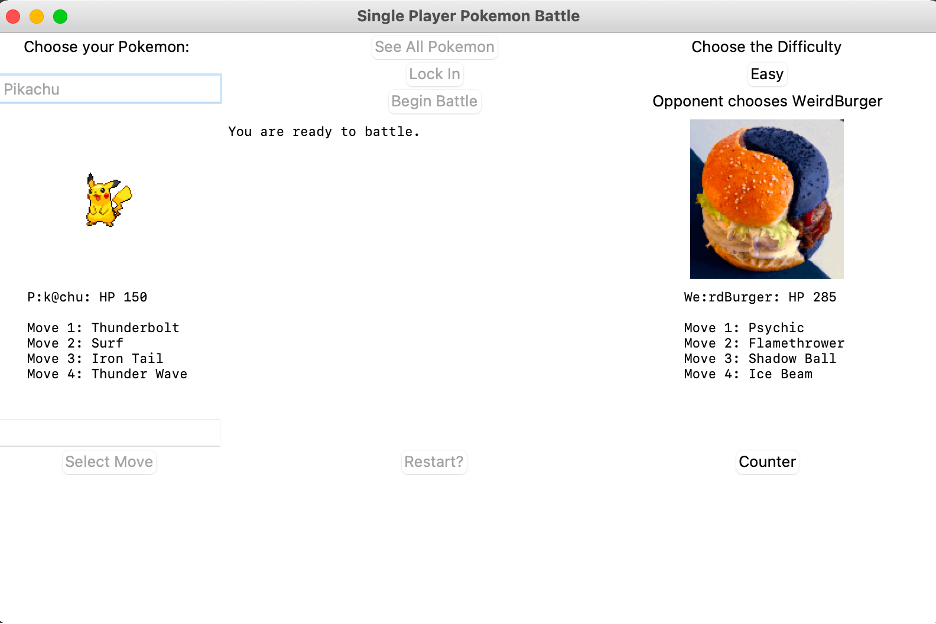